# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
### **Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*  José Francisco Muñoz Del Angel - A01794174 
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [25]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
# Importmaos las librerias necesarias para el trabajo.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


#**Ejercicio-1.** 

In [26]:
# Declaramos la liga de la que queremos obtener los datos.
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"

In [27]:
# Cargamos los datos en un dataframe de pandas.
df = pd.read_table(path, sep = ' ', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


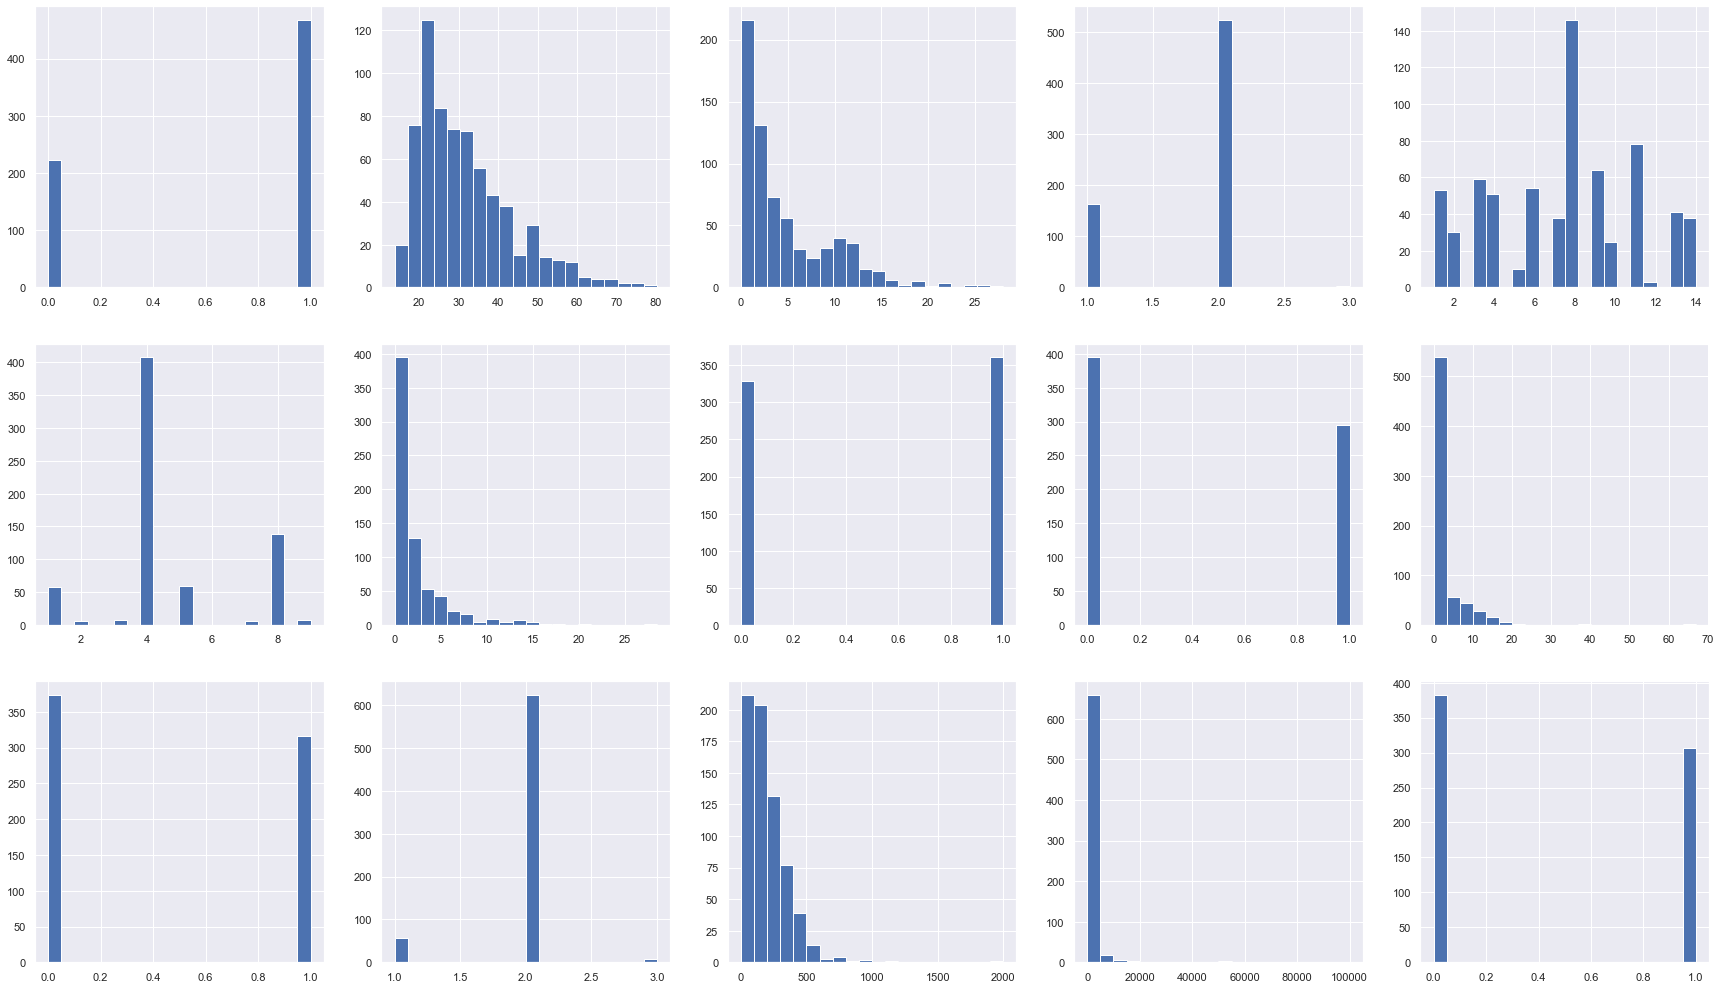

In [28]:
# Creamos un histograma para ver la distribución de los datos.
sns.set(rc = {'figure.figsize':(30,30)}) 
for x in range(0, 15):
    plt.subplot(5, 5, x+1) 
    var = df[x]
    plt.hist(var, bins = 20)
plt.show()

In [29]:
# Nombramos las columnas del dataset.
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [30]:
# Declaramos las variables de entrada.
X = df.iloc[:,1:]
X

,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [31]:
# Declara la variable de salida.
Y = df.iloc[:,0]
Y

0      1
1      0
2      0
3      0
4      1
      ..
685    1
686    1
687    0
688    0
689    1
Name: A1, Length: 690, dtype: int64

In [32]:
# Realizamos un pequeño análisis de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [33]:
#Partición de datos
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15, random_state = 0)
 
print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  
print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(586, 14) : dimensión de datos de entrada para entrenamiento
(104, 14) : dimensión de datos de entrada para prueba
(586,) : dimensión de variable de salida para entrenamiento
(104,) : dimensión de variable de salida para prueba


#**Ejercicio-2.**

**Clasificamos nuestras varibales.** 

**Binaria:** A1, A8, A9, A11.

**Categorica:** A4, A5, A6, A12, A15.

**Continua:** A2, A3, A7, A10, A13, A14.

Decidimos que imputación usaremos para cada tipo de tipo de dato. 

* Moda para categorica. 

* Promedio para continua.

* One hot encoder para binaria.

In [34]:
# Declaramos el pipeline para los datos numéricos.
numeric_pipeline = Pipeline(steps = [('impMean', SimpleImputer(strategy='mean')),
                                    ('escalaNum', StandardScaler())])  
numeric_pipeline_nombres = ['A2', 'A3', 'A8', 'A11', 'A14']

# Declaramos el pipeline para los datos categóricos.
categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
categ_pipeline_nombres = ['A4', 'A5', 'A6', 'A12', 'A15']

# Declaramos el pipeline para los datos binarios.
cat_binOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))]) 
cat_binOHE_pipeline_nombres = [ 'A1', 'A8', 'A9', 'A11']

In [35]:
ColumnTransformer = ColumnTransformer(transformers = [('num', numeric_pipeline, numeric_pipeline_nombres),
                                                    ('cat', categ_pipeline, categ_pipeline_nombres),
                                                    ('cat_binOHE', cat_binOHE_pipeline, cat_binOHE_pipeline_nombres)],
                                                    remainder = 'passthrough')


#**Ejercicio-3.**

In [36]:
# Entrenamiento del modelo dummy
dummy_clf = DummyClassifier(strategy = 'stratified').fit(Xtrain, Ytrain)
Ytest_predicted = dummy_clf.predict(Xtest)

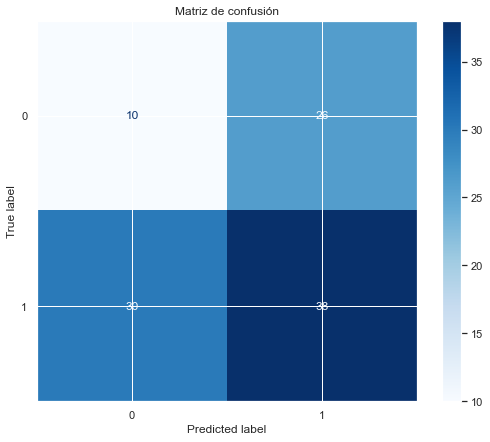

In [37]:
# Desplegar matriz de confusión.
sns.set(rc={'figure.figsize':(9,7)}) 
cmp = ConfusionMatrixDisplay.from_estimator(dummy_clf, Xtest, Ytest, cmap='Blues')
cmp.ax_.set_title('Matriz de confusión')
plt.show()

In [38]:
print('Accuracy: {:.2f}'.format(accuracy_score(Ytest, Ytest_predicted)))
print('Precision: {:.2f}'.format(precision_score(Ytest, Ytest_predicted,zero_division=0)))
print('Recall: {:.2f}'.format(recall_score(Ytest, Ytest_predicted)))
print('F1-score: {:.2f}'.format(f1_score(Ytest, Ytest_predicted)))
print(classification_report(Ytest, Ytest_predicted, target_names=['False', 'True'],zero_division=0))

Accuracy: 0.56
Precision: 0.66
Recall: 0.66
F1-score: 0.66
              precision    recall  f1-score   support

       False       0.36      0.36      0.36        36
        True       0.66      0.66      0.66        68

    accuracy                           0.56       104
   macro avg       0.51      0.51      0.51       104
weighted avg       0.56      0.56      0.56       104



“stratified”: generates predictions by respecting the training set’s class distribution.



#**Ejercicio-4.**

In [43]:
# Declaramos el clasificador SVC.
model_SVM = SVC()
model_SVM.fit(Xtrain, Ytrain)

SVC()

In [44]:
# Definimos los parámetros que queremos probar.
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}                                # kernel = 'rbf' es el kernel por defecto, si le pones otros tarda muchisimo. 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# Ajustamos el modelo a los datos de entrenamiento.
grid.fit(Xtrain, Ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
# Mejores parámetros.
print(grid.best_params_)

# Mejor modelo.
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [46]:
# Predicción con el mejor modelo.
Ypred = grid.predict(Xtest)
print(classification_report(Ytest, Ypred, target_names=['False', 'True'],zero_division=0))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        36
        True       0.65      1.00      0.79        68

    accuracy                           0.65       104
   macro avg       0.33      0.50      0.40       104
weighted avg       0.43      0.65      0.52       104



In [47]:
# Realizamos la cross validation para encontrar el mejor modelo.
all_accuracies = cross_val_score(estimator = model_SVM, X = Xtrain, y = Ytrain, cv = 5)
print(all_accuracies)


[0.6779661  0.67521368 0.68376068 0.68376068 0.68376068]


In [49]:
# Desplegamos el valor promedio de la accuracy media.
print(all_accuracies.mean())

0.6808923656381284


In [50]:
# Desplegamos la desviación estándar de la accuracy media.
print(all_accuracies.std())

0.0036191792483562923


This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

#**Ejercicio-5.**

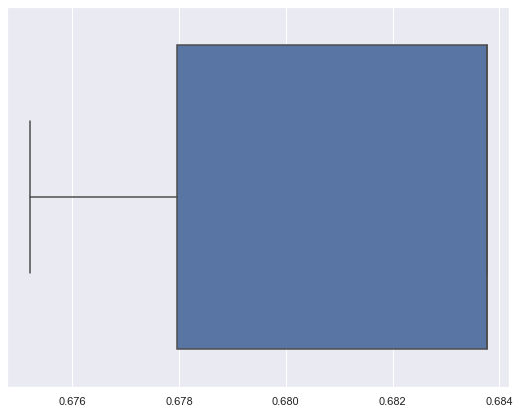

In [53]:
# Desplegamos el boxplot de la cross validation.
sns.set(rc={'figure.figsize':(9,7)})
sns.boxplot(x = all_accuracies)
plt.show()


Conclusiones.

#**Ejercicio-6.**

In [ ]:
None

#**Ejercicio-7.**

In [ ]:
None

#**Ejercicio-8.**

In [ ]:
None

#**Ejercicio-9.**

In [ ]:
None

#**Ejercicio-10.**

In [ ]:
None

###**Fin de la Actividad de la semana 8.**